# Start Pooling

In [1]:
#import general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import dirichlet
import scipy.optimize as sco
import random
from pathlib import Path
import pickle

%load_ext autoreload
%autoreload 2
import n_fct_t_rl_thm_ll as bond_fct
import prem_ibrd as prib

## Define Countries and Variables for Cat Bond Development

In [2]:
#choose country
countries = [480, 212, 882, 332, 670, 28, 388, 52, 662, 659, 308, 214, 44, 548, 242, 780, 192, 570, 84, 776, 90, 174, 184, 584, 585] #[480, 212, 332, 670, 28, 388, 52, 662, 659, 308, 214, 44, 882, 548, 242, 780, 192, 570, 84, 776, 90, 174, 184, 584, 585]
countries_150 = [332, 388, 214, 44, 548, 192, 84, 90] 
fiji = [242]
countries_30 = [480, 212, 670, 28, 52, 662, 659, 308, 882, 780, 570, 776, 174, 184, 584, 585]

countries_str = ['MUS', 'DMA', 'HIT', 'VCT', 'ATG', 'JAM', 'BRB', 'LCA', 'KNA', 'GRD', 'DOM', 'BHS', 'WSM', 'VUT', 'FJI', 'TTO', 'CUB', 'NIU', 'BLZ', 'TON', 'SLB', 'COM', 'COK', 'MHL', 'PLW']
countries_str_x_label = ['MUS', 'DMA', 'HIT', 'VCT', 'ATG', 'JAM', 'BRB', 'LCA', 'KNA', 'GRD', 'DOM', 'BHS', 'WSM', 'VUT', 'FJI', 'TTO', 'CUB', 'NIU', 'BLZ', 'TON', 'SLB', 'COM', 'COK', 'MHL', 'PLW', 'Pool']

pools = [[480, 212, 882, 332, 670, 28, 388, 52, 662, 659, 308, 214, 44, 548, 242, 780, 192, 570, 84, 776, 90, 174, 184, 584, 585]]

#set risk free rate, either single value or array
rf_rates = 0.00
#set risk muliplier reported by artems
artemis_multiplier = 4.54
#set sharpe ratio to beat
target_sharpe = 0.5
#inititate IBRD premium calculation function
params_ibrd = prib.init_prem_ibrd(want_plot=False)
a, k, b = params_ibrd
#define bond setting
lower_share = 0.05
prot_rp = 250


## Designe Multi-Country Bond
### Set Variables for Multi-Country Bond

In [3]:
sng_ann_ret_df_ibrd = pd.read_csv("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/sng_returns_ibrd.csv")
sng_ann_ret_df_regression = pd.read_csv("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/sng_returns_regression.csv")
sng_ann_ret_df_artemis = pd.read_csv("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/sng_returns_artemis.csv")
sng_ann_ret_df_required = pd.read_csv("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/sng_returns_required.csv")
output_path = Path("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/bond_metrics_sng_dic.pkl")
with open(output_path, "rb") as file:
    bond_metrics_sng_dic = pickle.load(file)

sng_ann_ret_required = sng_ann_ret_df_required.to_dict('series')
sng_ann_ret_artemis = sng_ann_ret_df_artemis.to_dict('series')
sng_ann_ret_regression = sng_ann_ret_df_regression.to_dict('series')
sng_ann_ret_ibrd = sng_ann_ret_df_ibrd.to_dict('series')

nominal_sng_dic_df = pd.read_csv("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/nominal_dic_df.csv")
# Specify the output path
output_path = Path("C:/Users/kaibe/Documents/ETH_Zurich/Thesis/Data/simulation_results/pay_dam_df_dic.pkl")
with open(output_path, "rb") as file:
    pay_dam_df_sng_dic = pickle.load(file)

nominal_sng_dic = dict(zip(nominal_sng_dic_df["Key"], nominal_sng_dic_df["Value"]))

coverage_cty = []
cty_ls = []
for cty in bond_metrics_sng_dic:
    coverage_cty.append(bond_metrics_sng_dic[cty]['Premium'][3])
    cty_ls.append(cty)
coverage_cty = pd.DataFrame({"Country": cty_ls, "Coverage": coverage_cty})


### Create Multi-Country bond

In [9]:
tranches_array = np.array([50, 250, 1000])

ncf_p = {}
premiums_p = {}
premium_dic_p = {}
nominal_p = {}
es_metrics_p = {}
MES_cty_p = {}
tranches_p = {}

i = 0
for pool in pools:
    i += 1
    if len(pool) > 1:
        nominal_dic_pool = {}
        pay_dam_df_dic_pool = {}
        for cty in pool:
            nominal_dic_pool[cty] = nominal_sng_dic[cty]
            pay_dam_df_dic_pool[cty] = pay_dam_df_sng_dic[cty]
        ncf_p[str(i)], premiums_p[str(i)], premium_dic_p[str(i)], nominal_p[str(i)], es_metrics_p[str(i)], MES_cty_p[str(i)], tranches_p[str(i)] = bond_fct.mlt_cty_bond(countries=pool,pay_dam_df_dic=pay_dam_df_dic_pool,
                                                                                                                                                                         nominals_dic=nominal_dic_pool, tranches_array=tranches_array, 
                                                                                                                                                                         opt_cap=True)

c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\functions.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tranches = pd.concat([tranch_df, pd.DataFrame(rows)], ignore_index=True)


Reduction of Principal: 36.98%


In [10]:
pool_tranches_ann_ret_regr = {}
pool_tranches_ann_ret_ibrd ={}
pool_tranches_ann_ret_requ ={}
pool_tranches_ann_ret_arte ={}

for key in ncf_p["1"]['regression']:
    if key != 'Total':
        for pool in ncf_p:
            pool_tranches_ann_ret_regr[f"{pool}: {key}"] = ncf_p[pool]['regression'][key] / tranches_p[pool].loc[tranches_p[pool]['RP'] == key, 'nominal'].iloc[0]
            pool_tranches_ann_ret_ibrd[f"{pool}: {key}"] = ncf_p[pool]['ibrd'][key] / tranches_p[pool].loc[tranches_p[pool]['RP'] == key, 'nominal'].iloc[0]
            pool_tranches_ann_ret_requ[f"{pool}: {key}"] = ncf_p[pool]['required'][key] / tranches_p[pool].loc[tranches_p[pool]['RP'] == key, 'nominal'].iloc[0]
            pool_tranches_ann_ret_arte[f"{pool}: {key}"] = ncf_p[pool]['artemis'][key] / tranches_p[pool].loc[tranches_p[pool]['RP'] == key, 'nominal'].iloc[0]

i = 0
for pool in pools:
    i += 1
    if len(pool) == 1:
        pool_tranches_ann_ret_regr[str(i)] = sng_ann_ret_regression[str(pool[0])]
        pool_tranches_ann_ret_ibrd[str(i)] = sng_ann_ret_ibrd[str(pool[0])]
        pool_tranches_ann_ret_requ[str(i)] = sng_ann_ret_required[str(pool[0])]
        pool_tranches_ann_ret_arte[str(i)] = sng_ann_ret_artemis[str(pool[0])]

p_ann_ret_regr = {}
p_ann_ret_requ = {}
p_ann_ret_arte = {}
p_ann_ret_ibrd = {}
for pool in ncf_p:
    p_ann_ret_regr[pool] = 0
    p_ann_ret_ibrd[pool] = 0
    p_ann_ret_requ[pool] = 0
    p_ann_ret_arte[pool] = 0
    for rp in ncf_p[pool]['regression']:
        if rp != 'Total':
            p_ann_ret_regr[pool] += ncf_p[pool]['regression'][rp]
            p_ann_ret_ibrd[pool] += ncf_p[pool]['ibrd'][rp]
            p_ann_ret_requ[pool] += ncf_p[pool]['required'][rp]
            p_ann_ret_arte[pool] += ncf_p[pool]['artemis'][rp]

i = 0
for pool in pools:
    i += 1
    if len(pool) == 1:
        p_ann_ret_regr[str(i)] = sng_ann_ret_regression[str(pool[0])]
        p_ann_ret_ibrd[str(i)] = sng_ann_ret_ibrd[str(pool[0])]
        p_ann_ret_requ[str(i)] = sng_ann_ret_required[str(pool[0])]
        p_ann_ret_arte[str(i)] = sng_ann_ret_artemis[str(pool[0])]

Premium savings ibrd: [0.8455864002618418, 0.8268209176419812, 0.6189365749347653, 0.661494217378465, 0.7182369158282907, 0.7964180393854291, 0.6341955744849951, 0.7407563576151984, 0.8013980438262743, 0.7944673954883947, 0.5926718824075481, 0.7751996497643809, 0.546580279559685, 0.6179118454832712, 0.6237712077796649, 0.4868593076824408, 0.44971655329673255, 0.6015002265250836, 0.497164280100873, 0.5422750334081528, 0.38601062925114826, 0.3684738123265322, 0.41586479179068336, 0.35748432463688795, 0.347030069972438, 0.6568224890663833]
Insurance Multiples: [1.8997308306703797, 1.9428470183776618, 2.595397686333718, 2.428421159808768, 2.2365691865343296, 2.0170142753328437, 2.532951378409551, 2.1685761290589913, 2.0044802541609834, 2.021966620273306, 2.7104146531256923, 2.0722230138536064, 2.9389764223968733, 2.599701828529674, 2.575281665037079, 3.2994882283749787, 3.5719978346295775, 2.6706333326809086, 3.2310980874311306, 2.962309631843093, 4.1615086032458715, 4.359567765292004, 3.8

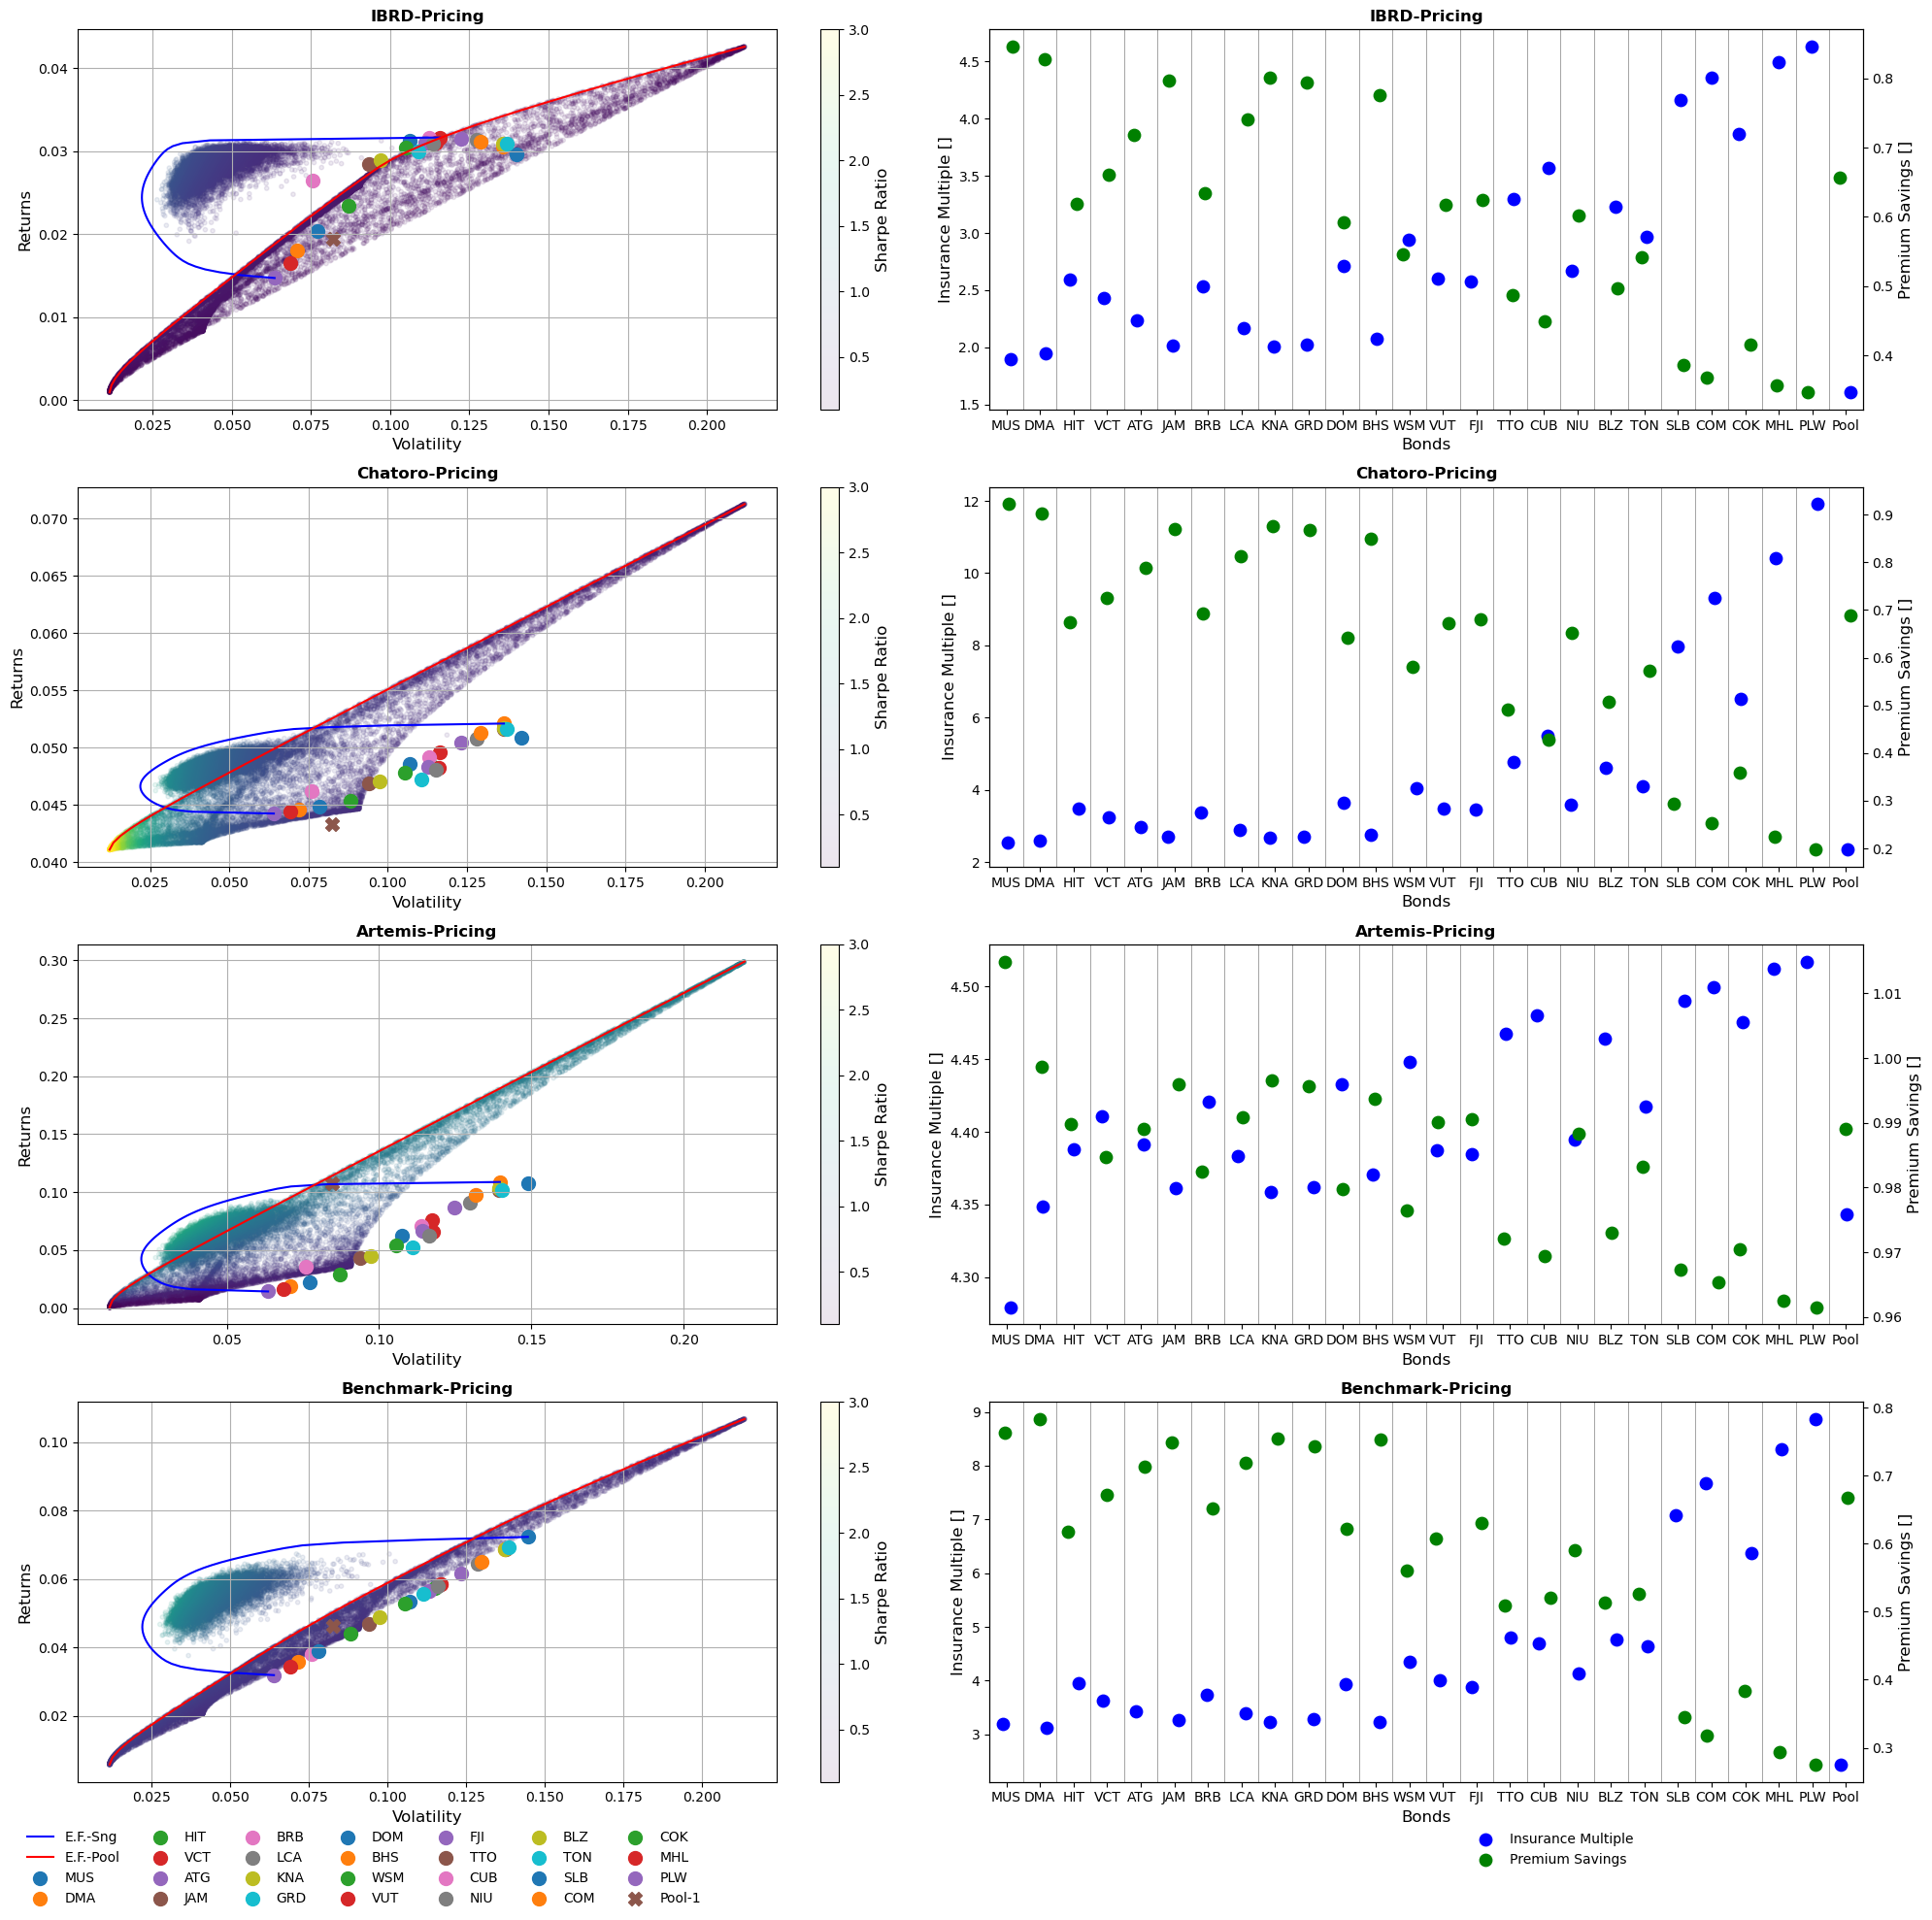

In [16]:
premium_methods = ['ibrd', 'regression', 'artemis', 'required']
premium_methods_title = ['IBRD-Pricing', 'Chatoro-Pricing', 'Artemis-Pricing', 'Benchmark-Pricing']
num_plots = len(premium_methods)
fig, axes = plt.subplots(num_plots, 2, figsize=(20, 5 * num_plots))  # 2 columns for function and derivative

for j, prem_mode in enumerate(premium_methods): 
    premiums_pool = {}
    for pool, prem_modes in premiums_p.items():
        if prem_mode in prem_modes:
            for key, values in prem_modes[prem_mode].items():
                values = np.array(values)
                if key in premiums_pool:  # If the key already exists, sum the values
                    premiums_pool[key] += np.sum(values * nominal_p[pool])
                else:  # Otherwise, initialize it with the current value
                    premiums_pool[key] = np.sum(values * nominal_p[pool])
            
    if prem_mode == 'ibrd':
        sng_ann_ret = sng_ann_ret_ibrd
        sng_ann_ret_df = sng_ann_ret_df_ibrd
        pool_tranches_ann_ret_df = pool_tranches_ann_ret_ibrd
        pool_ann_ret = p_ann_ret_ibrd
        sng_cty_premium = []
        sng_cty_pay = []
        for cty in bond_metrics_sng_dic:
            sng_cty_premium.append(bond_metrics_sng_dic[cty]['Total Premiums'][0])
            sng_cty_pay.append(bond_metrics_sng_dic[cty]['Summed Payments'][0])
        for pool in pools:
            if len(pool) == 1:
                premiums_pool['Total_alt'] += bond_metrics_sng_dic[pool[0]]['Total Premiums'][0]
                premiums_pool[pool[0]] = bond_metrics_sng_dic[pool[0]]['Total Premiums'][0]

    elif prem_mode == 'regression':
        sng_ann_ret = sng_ann_ret_regression
        sng_ann_ret_df = sng_ann_ret_df_regression
        pool_tranches_ann_ret_df = pool_tranches_ann_ret_regr
        pool_ann_ret = p_ann_ret_regr
        sng_cty_premium = []
        sng_cty_pay = []
        for cty in bond_metrics_sng_dic:
            sng_cty_premium.append(bond_metrics_sng_dic[cty]['Total Premiums'][1])
            sng_cty_pay.append(bond_metrics_sng_dic[cty]['Summed Payments'][1])
        for pool in pools:
            if len(pool) == 1:
                premiums_pool['Total_alt'] += bond_metrics_sng_dic[pool[0]]['Total Premiums'][1]
                premiums_pool[pool[0]] = bond_metrics_sng_dic[pool[0]]['Total Premiums'][1]

    elif prem_mode == 'artemis':
        sng_ann_ret = sng_ann_ret_artemis
        sng_ann_ret_df = sng_ann_ret_df_artemis
        pool_tranches_ann_ret_df = pool_tranches_ann_ret_arte
        pool_ann_ret = p_ann_ret_arte
        sng_cty_premium = []
        sng_cty_pay = []
        for cty in bond_metrics_sng_dic:
            sng_cty_premium.append(bond_metrics_sng_dic[cty]['Total Premiums'][3])
            sng_cty_pay.append(bond_metrics_sng_dic[cty]['Summed Payments'][3])
        for pool in pools:
            if len(pool) == 1:
                premiums_pool['Total_alt'] += bond_metrics_sng_dic[pool[0]]['Total Premiums'][3]
                premiums_pool[pool[0]] = bond_metrics_sng_dic[pool[0]]['Total Premiums'][3]

    elif prem_mode == 'required':
        sng_ann_ret = sng_ann_ret_required
        sng_ann_ret_df = sng_ann_ret_df_required
        pool_tranches_ann_ret_df = pool_tranches_ann_ret_requ
        pool_ann_ret = p_ann_ret_requ
        sng_cty_premium = []
        sng_cty_pay = []
        for cty in bond_metrics_sng_dic:
            sng_cty_premium.append(bond_metrics_sng_dic[cty]['Total Premiums'][2])
            sng_cty_pay.append(bond_metrics_sng_dic[cty]['Summed Payments'][2])
        for pool in pools:
            if len(pool) == 1:
                premiums_pool['Total_alt'] += bond_metrics_sng_dic[pool[0]]['Total Premiums'][2]
                premiums_pool[pool[0]] = bond_metrics_sng_dic[pool[0]]['Total Premiums'][2]
    else:
        print('Wrong input premium mode')
        break

    df_returns = pd.DataFrame({f"{country} Returns": returns for country, returns in sng_ann_ret.items()})
    df_returns_pool = pd.DataFrame({f"{country} Returns": returns for country, returns in pool_tranches_ann_ret_df.items()})

    r = np.mean(df_returns,axis=0)
    r_pool= np.mean(df_returns_pool,axis=0)

    # Create a covariance matrix
    covar = df_returns.cov()
    covar_pool = df_returns_pool.cov()

    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights

    num_assets = len(df_returns.columns)

    p_ret_pool = [] # Define an empty array for portfolio returns
    p_vol_pool = [] # Define an empty array for portfolio volatility
    p_weights_pool = [] # Define an empty array for asset weights

    num_assets_pool = len(df_returns_pool.columns)

    num_portfolios = 10000  # Number of portfolios to simulate
    alpha_port = 0.3


    for _ in range(num_portfolios):
        weights = dirichlet([alpha_port] * num_assets)
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, r) 
        p_ret.append(returns)
        var = covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
        sd = np.sqrt(var) # yearly standard deviation
        p_vol.append(sd)    

        weights_pool = dirichlet([alpha_port] * num_assets_pool)
        weights_pool = weights_pool/np.sum(weights_pool)
        p_weights_pool.append(weights_pool)
        returns_pool = np.dot(weights_pool, r_pool) 
        p_ret_pool.append(returns_pool)
        var_pool = covar_pool.mul(weights_pool, axis=0).mul(weights_pool, axis=1).sum().sum()# Portfolio Variance
        sd_pool = np.sqrt(var_pool) # yearly standard deviation
        p_vol_pool.append(sd_pool)

    data = {'Returns':p_ret, 'Volatility':p_vol, 'Sharpe Ratio':np.array(p_ret)/np.array(p_vol)}
    data_pool = {'Returns':p_ret_pool, 'Volatility':p_vol_pool, 'Sharpe Ratio':np.array(p_ret_pool)/np.array(p_vol_pool)}

    for counter, symbol in enumerate(df_returns.columns.tolist()):
        data[str(symbol)+' weight'] = [w[counter] for w in p_weights]

    for counter, symbol in enumerate(df_returns_pool.columns.tolist()):
        data_pool[str(symbol)+' weight'] = [w[counter] for w in p_weights_pool]

    portfolios  = pd.DataFrame(data)
    portfolios_pool  = pd.DataFrame(data_pool)
    portfolios_tot = pd.concat([portfolios, portfolios_pool], axis=0)

    # Function to calculate portfolio risk (standard deviation)
    def portfolio_risk(weights, cov_matrix):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Function to calculate portfolio return
    def portfolio_return(weights, mean_returns):
        return np.sum(weights * mean_returns)

    # Function for optimization: minimize risk for a given return
    def minimize_risk(target_return, mean_returns, cov_matrix):
        # Number of assets in the portfolio
        num_assets = len(mean_returns)

        # Constraints: weights sum to 1, and portfolio return equals target return
        constraints = ({
            'type': 'eq', 'fun': lambda w: np.sum(w) - 1  # Weights sum to 1
        }, {
            'type': 'eq', 'fun': lambda w: portfolio_return(w, mean_returns) - target_return  # Target return constraint
        })

        # Initial guess: equal weights
        initial_guess = np.ones(num_assets) / num_assets

        # Bounds for weights: between 0 and 1
        bounds = tuple((0, 1) for asset in range(num_assets))

        # Minimize risk (objective function)
        result = sco.minimize(portfolio_risk, initial_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

        return result.x, result.fun  # Return the optimized weights and the minimized risk

    # Generate a series of target returns and corresponding risks
    target_returns = np.linspace(np.min(r), np.max(r), 50)  # Range of target returns
    risks = []

    for target_return in target_returns:
        weights, risk = minimize_risk(target_return, r, covar)
        risks.append(risk)

    ## Repeat for the second data set (df_returns_pool)
    risks_pool = []
    target_returns_pool = np.linspace(np.min(r_pool), np.max(r_pool), 50)
    for target_return in target_returns_pool:
        weights, risk = minimize_risk(target_return, r_pool, covar_pool)
        risks_pool.append(risk)



    scatter = axes[j, 0].scatter(
        x=portfolios_tot['Volatility'], 
        y=portfolios_tot['Returns'], 
        c=portfolios_tot['Sharpe Ratio'], 
        cmap='viridis', 
        marker='o', 
        s=10, 
        alpha=0.1,
        vmin=0.1,  
        vmax=3.0
    )    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Sharpe Ratio', fontsize=12)
    axes[j, 0].plot(risks, target_returns, label="E.F.-Sng", color='blue')
    axes[j, 0].plot(risks_pool, target_returns_pool, label="E.F.-Pool", color='red')

    for i, cty in enumerate(countries):
        axes[j, 0].scatter(np.std(sng_ann_ret[str(cty)]), np.mean(sng_ann_ret[str(cty)]), label=countries_str[i], s=100)
    for pool in pool_ann_ret:
        axes[j, 0].scatter(np.std(pool_ann_ret[pool]), np.mean(pool_ann_ret[pool]), label=f'Pool-{pool}', marker='X', s=100)
    axes[j, 0].set_xlabel("Volatility", fontsize=12)
    axes[j, 0].set_ylabel("Returns", fontsize=12)
    axes[j, 0].grid(True)
    axes[j, 0].set_title(f"{premium_methods_title[j]}", fontsize=12, fontweight='bold')

    s_pool = []
    n = []
    s = sng_cty_premium
    for cty in countries:
        s_pool.append(np.sum(premiums_pool[cty]))
        n.append(nominal_sng_dic[cty])
    prem_diff = (np.array(s_pool)/np.array(s)).tolist()
    prem_diff.append(float(np.sum(premiums_pool['Total_alt'])/np.sum(s)))
    im = (np.array(sng_cty_premium)/np.array(sng_cty_pay)).tolist()
    tot_pay = 0
    for pool in es_metrics_p:
        tot_pay += es_metrics_p[pool]['Payout']
    im.append(np.sum(premiums_pool['Total_alt'])/tot_pay)

    print(f'Premium savings {prem_mode}: {prem_diff}')
    print(f'Insurance Multiples: {im}')

    def jitter(x):
        return x + random.uniform(-0.2, .2)

    type_ids= {}
    for i, cty in enumerate(countries_str_x_label):
        type_ids[cty] = i

    jitter_type_im = [jitter(type_ids[cty]) for cty in countries_str_x_label]
    jitter_type_ps = [jitter(type_ids[cty]) for cty in countries_str_x_label]

    axes[j, 1].scatter(jitter_type_im, im, color='blue', label='Insurance Multiple', s=80)
    axes[j, 1].set_xlabel("Bonds", fontsize=12)
    axes[j, 1].set_ylabel("Insurance Multiple []", fontsize=12)
    axes[j, 1].tick_params(axis='y')

    x_positions = np.arange(0.5, len(countries_str_x_label)-1+0.6).tolist()  # Specify the positions where you want the vertical lines
    for x in x_positions:
        axes[j, 1].axvline(x=x, color='gray', linestyle='-', linewidth=0.5)

    ax2 = axes[j, 1].twinx()
    ax2.scatter(jitter_type_ps, prem_diff, color='green', label='Premium Savings', s=80)
    ax2.set_ylabel("Premium Savings []", fontsize=12)
    ax2.tick_params(axis='y')
        
    axes[j, 1].set_xlim(-0.5, len(countries_str_x_label) - 0.5)
    axes[j, 1].set_xticks(np.arange(0, len(countries_str_x_label)).tolist())
    axes[j, 1].set_xticklabels(list(type_ids.keys()))
    axes[j, 1].set_title(f"{premium_methods_title[j]}", fontsize=12, fontweight='bold')



handles0, labels0 = axes[j, 0].get_legend_handles_labels()
fig.legend(
    handles0,
    labels0,
    loc='lower left',
    bbox_to_anchor=(0.01, 0.01),
    ncol=7,
    frameon=False,
)

handles1, labels1 = axes[j, 1].get_legend_handles_labels()  
handles2, labels2 = ax2.get_legend_handles_labels() 
fig.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc='lower right',
    bbox_to_anchor=(0.85, 0.03),
    ncol=1,
    frameon=False
)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [ ]:
for j, prem_mode in enumerate(premium_methods): 
    premiums_pool = {}
    for pool, prem_modes in premiums_p.items():
        if prem_mode in prem_modes:
            for key, values in prem_modes[prem_mode].items():
                values = np.array(values)
                if key in premiums_pool:  # If the key already exists, sum the values
                    premiums_pool[key] += np.sum(values * nominal_p[pool])
                else:  # Otherwise, initialize it with the current value
                    premiums_pool[key] = np.sum(values * nominal_p[pool])
    print(prem_mode,premiums_pool['Total'] - premiums_pool['Total_alt'])

ibrd 4968339348297.598
regression 1546842259885.0469
artemis 0.01953125
required -1942546160541.9453
